# Import

In [34]:
# Basic
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

# Dataset
from sklearn.datasets import make_moons, load_boston

# ML Toolkit
from robusta.crossval import crossval, rating_table

# Model
from robusta.calibration import CalibratedClassifierCV
from robusta.testing import all_models

# Plot
from jupyterthemes import jtplot
import seaborn as sns
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

# Correlations

In [49]:
def plot_corr_matrix(results, cmap='icefire', method='kendall', n_digits=2, **kwargs):
    
    idx_list = results.keys()
    model_names = [result['model_name'] for result in results.values()]
    for idx, model_name in zip(idx_list, model_names):
        print('[{}] {}'.format(idx, model_name))
    
    preds = [result['oof_pred'] for result in results.values()]
    preds = pd.concat(preds, axis=1)
    preds.columns = idx_list

    corr = preds.corr(method).round(n_digits)
    corr = corr.groupby(corr.index).mean().loc[idx_list]
    
    ax = sns.heatmap(corr, annot=True, cmap=cmap, center=0, **kwargs)
    return ax

# All Classifiers

In [41]:
X, y = make_moons(200, noise=0.2)

X = pd.DataFrame(X)
y = pd.Series(y)

X

,0,1
0,-0.523155,1.040627
1,0.165491,1.083847
2,0.574454,-0.698843
3,-1.002418,0.185955
4,2.265611,0.209065
...,...,...
195,1.477658,-0.354544
196,0.122020,0.301228
197,0.773100,-0.383444
198,0.629207,-0.431419


In [42]:
scoring = 'roc_auc'
cv = 5

In [43]:
BLACKLIST = ['RVM', 'Blend', 'CatBoost']

results = {}

for model_dict in all_models(['classifier']):
    
    try:
        clf = model_dict['class']() # default params
        name = model_dict['name']
    except:
        continue
    
    if name in BLACKLIST:
        continue
    
    if not hasattr(clf, 'predict_proba'):
        if hasattr(clf, 'decision_function'):
            clf = CalibratedClassifierCV(clf)
        else:
            continue
    
    try:
        result = crossval(clf, cv, X, y, scoring=scoring, method='predict_proba',
                          verbose=2, n_jobs=-1, n_digits=6)
        result['model_name'] = name
        results[name] = result
    except:
        pass
    
idx_results = dict(zip(range(len(results)), results.values()))

[22:08:57]  LogisticRegression

[22:08:57]  FOLD  0:   0.955000
[22:08:57]  FOLD  1:   0.922500
[22:08:57]  FOLD  2:   0.950000
[22:08:57]  FOLD  3:   0.950000
[22:08:57]  FOLD  4:   0.957500

[22:08:57]  AVERAGE:   0.947000 ± 0.012590

[22:08:57]  LogisticRegressionCV

[22:08:57]  FOLD  0:   0.955000
[22:08:57]  FOLD  1:   0.917500
[22:08:57]  FOLD  2:   0.952500
[22:08:57]  FOLD  3:   0.955000
[22:08:57]  FOLD  4:   0.957500

[22:08:58]  AVERAGE:   0.947500 ± 0.015083

[22:08:58]  PassiveAggressiveClassifier

[22:08:58]  FOLD  0:   0.950000
[22:08:58]  FOLD  1:   0.917500
[22:08:58]  FOLD  2:   0.952500
[22:08:58]  FOLD  3:   0.957500
[22:08:58]  FOLD  4:   0.960000

[22:08:58]  AVERAGE:   0.947500 ± 0.015411

[22:08:58]  Perceptron

[22:08:58]  FOLD  0:   0.952500
[22:08:58]  FOLD  1:   0.922500
[22:08:58]  FOLD  2:   0.947500
[22:08:58]  FOLD  3:   0.945000
[22:08:58]  FOLD  4:   0.942500

[22:08:59]  AVERAGE:   0.942000 ± 0.010296

[22:08:59]  RidgeClassifier

[22:08:59]  FOLD  0:

In [44]:
top = rating_table(idx_results).sort_values('LOCAL', ascending=False)
top

,MODEL_NAME,PRIVATE,PUBLIC,LOCAL,STD,MIN,MAX
7,SVM,None,None,0.9765,0.0176,0.9550,0.9925
8,NuSVM,None,None,0.9765,0.0176,0.9550,0.9925
9,LinearSVM,None,None,0.9765,0.0176,0.9550,0.9925
21,XGB,None,None,0.9738,0.0144,0.9600,0.9975
17,GradientBoosting,None,None,0.9730,0.0207,0.9400,0.9900
12,KNeighbors,None,None,0.9698,0.0277,0.9400,1.0000
15,ExtraTrees,None,None,0.9685,0.0218,0.9462,0.9925
13,GaussianProcess,None,None,0.9680,0.0171,0.9400,0.9825
22,LGB,None,None,0.9660,0.0257,0.9375,0.9975
14,RandomForest,None,None,0.9660,0.0278,0.9225,0.9950


[7] SVM
[8] NuSVM
[9] LinearSVM
[21] XGB
[17] GradientBoosting
[12] KNeighbors
[15] ExtraTrees
[13] GaussianProcess
[22] LGB
[14] RandomForest


<IPython.core.display.Javascript object>


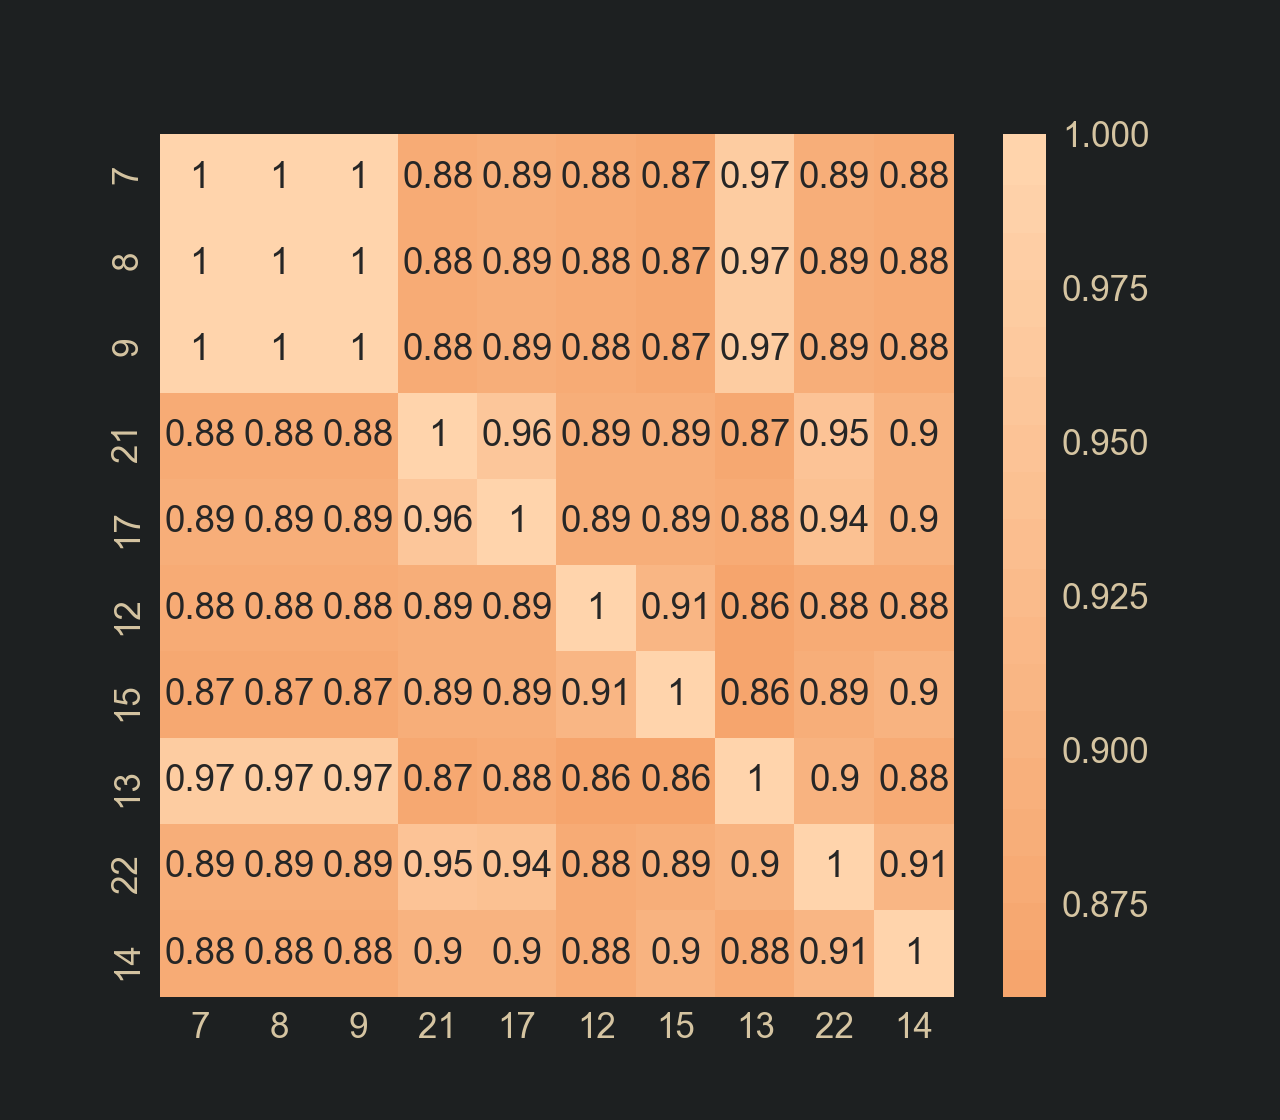

In [53]:
%matplotlib notebook

K_TOP = 10

top_results = {i: idx_results[i] for i in top.index[:K_TOP]}
ax = plot_corr_matrix(top_results, method='spearman')

# All Regressors

In [6]:
X, y = load_boston(return_X_y=True)

X = pd.DataFrame(X)
y = pd.Series(y)

X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
scoring = 'neg_mean_squared_error'
cv = 5

In [22]:
BLACKLIST = ['RVM', 'Blend', 'CatBoost', 'RANSAC', 'SGD', 'BART']

results = {}

for model_dict in all_models(['regressor']):
    
    try:
        reg = model_dict['class']() # default params
        name = model_dict['name']
    except:
        continue
    
    if name in BLACKLIST or 'MultiTask' in name:
        continue
    
    try:
        result = crossval(reg, cv, X, y, scoring=scoring, method='predict',
                          verbose=2, n_jobs=-1, n_digits=6)
        result['model_name'] = name
        results[name] = result
    except:
        pass
    
idx_results = dict(zip(range(len(results)), results.values()))

[21:53:49]  ARDRegression

[21:53:50]  FOLD  0:   -12.078103
[21:53:50]  FOLD  1:   -27.941054
[21:53:50]  FOLD  2:   -34.629844
[21:53:50]  FOLD  3:   -82.450822
[21:53:50]  FOLD  4:   -30.094400

[21:53:50]  AVERAGE:   -37.438845 ± 23.754093

[21:53:50]  BayesianRidge

[21:53:50]  FOLD  0:   -11.581218
[21:53:50]  FOLD  1:   -24.756935
[21:53:50]  FOLD  2:   -30.559152
[21:53:50]  FOLD  3:   -79.668654
[21:53:50]  FOLD  4:   -28.373133

[21:53:50]  AVERAGE:   -34.987818 ± 23.290702

[21:53:50]  ElasticNet

[21:53:50]  FOLD  0:   -14.842521
[21:53:50]  FOLD  1:   -30.708818
[21:53:50]  FOLD  2:   -47.794117
[21:53:50]  FOLD  3:   -47.469322
[21:53:50]  FOLD  4:   -19.453671

[21:53:51]  AVERAGE:   -32.053690 ± 13.727318

[21:53:51]  ElasticNetCV

[21:53:51]  FOLD  0:   -18.725018
[21:53:51]  FOLD  1:   -33.229853
[21:53:51]  FOLD  2:   -56.152104
[21:53:51]  FOLD  3:   -47.027793
[21:53:51]  FOLD  4:   -19.729887

[21:53:51]  AVERAGE:   -34.972931 ± 14.786889

[21:53:51]  HuberRegress

[21:54:13]  FOLD  1:   -13.057489
[21:54:13]  FOLD  2:   -16.732854
[21:54:13]  FOLD  3:   -37.429562
[21:54:13]  FOLD  4:   -15.611183

[21:54:13]  AVERAGE:   -18.088824 ± 10.169544

[21:54:13]  LGBMRegressor

[21:54:14]  FOLD  0:   -9.001189
[21:54:14]  FOLD  1:   -15.725985
[21:54:14]  FOLD  2:   -18.180494
[21:54:14]  FOLD  3:   -43.948839
[21:54:14]  FOLD  4:   -24.959973

[21:54:14]  AVERAGE:   -22.363296 ± 11.939632



In [30]:
top = rating_table(idx_results).sort_values('LOCAL', ascending=False)
top

,MODEL_NAME,PRIVATE,PUBLIC,LOCAL,STD,MIN,MAX
32,XGB,None,None,-18.0888,11.3699,-37.4296,-7.6130
28,GradientBoosting,None,None,-18.6857,11.7325,-38.2812,-7.4917
26,ExtraTrees,None,None,-20.9457,13.0716,-43.4499,-10.7366
27,Bagging,None,None,-21.3185,13.2930,-43.5003,-8.8475
33,LGB,None,None,-22.3633,13.3489,-43.9488,-9.0012
29,AdaBoost,None,None,-23.2418,14.6243,-45.7200,-8.8789
19,MARS,None,None,-23.9548,17.6655,-51.1010,-7.1707
25,RandomForest,None,None,-25.1314,15.2546,-48.9637,-9.1615
2,ElasticNet,None,None,-32.0537,15.3476,-47.7941,-14.8425
3,ElasticNetCV,None,None,-34.9729,16.5322,-56.1521,-18.7250


[32] XGB
[28] GradientBoosting
[26] ExtraTrees
[27] Bagging
[33] LGB
[29] AdaBoost
[19] MARS
[25] RandomForest
[2] ElasticNet
[3] ElasticNetCV


<IPython.core.display.Javascript object>


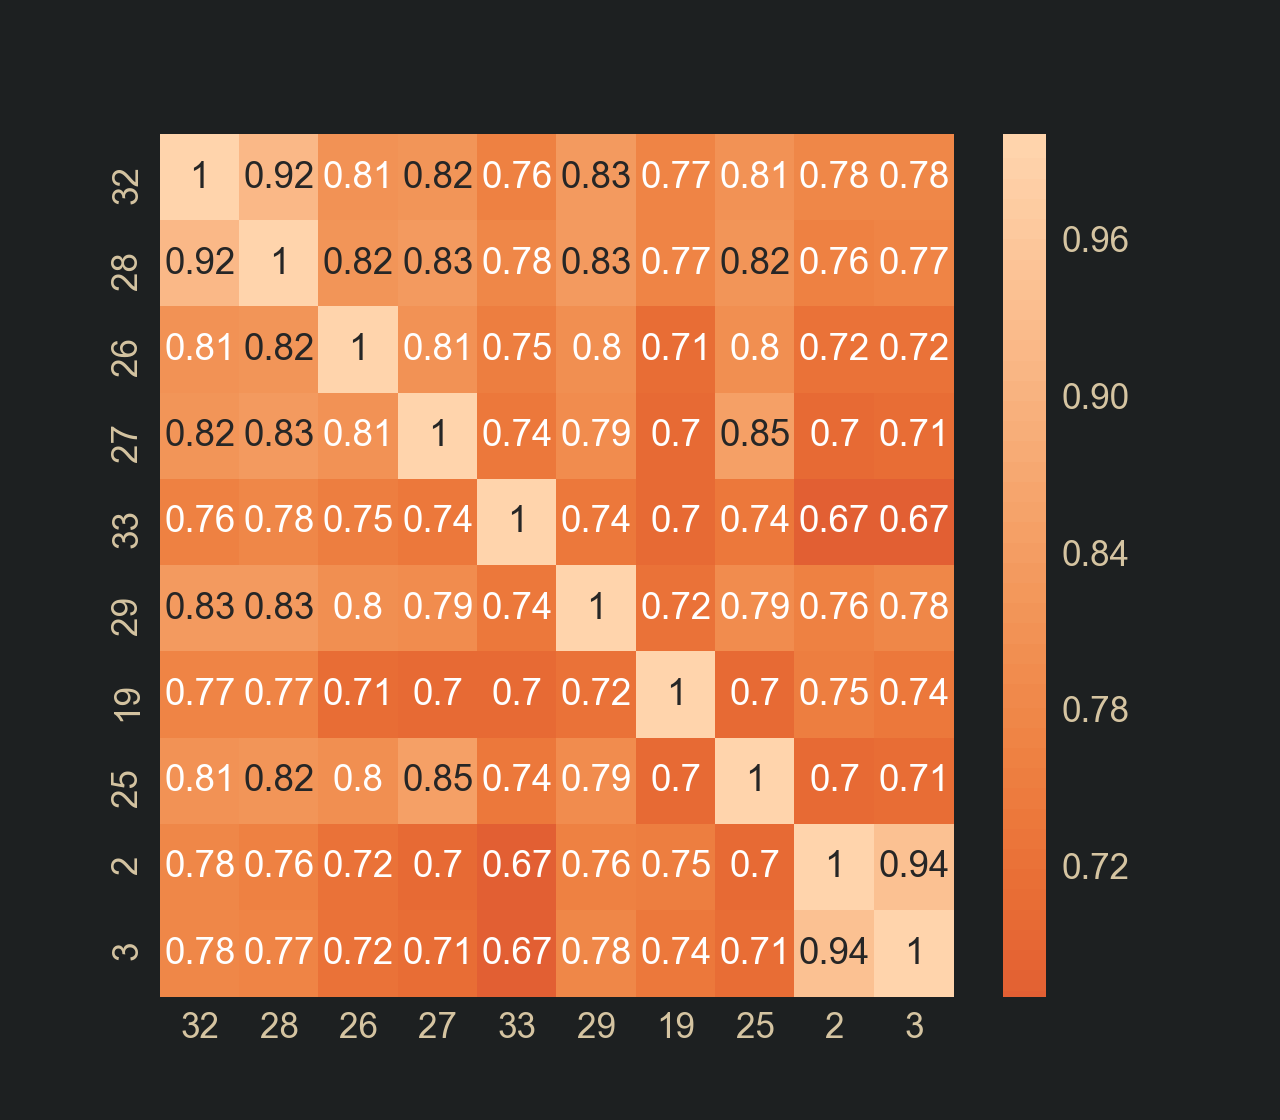

In [38]:
%matplotlib notebook

K_TOP = 10

top_results = {i: idx_results[i] for i in top.index[:K_TOP]}
ax = plot_corr_matrix(top_results)